In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
'''
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download grassknoted/asl-alphabet
! unzip asl-alphabet.zip
''' 

'\n! pip install kaggle\n! mkdir ~/.kaggle\n! cp kaggle.json ~/.kaggle/\n! chmod 600 ~/.kaggle/kaggle.json\n! kaggle datasets download grassknoted/asl-alphabet\n! unzip asl-alphabet.zip\n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import skimage
from skimage.transform import resize
import seaborn as sns
import glob
import os
import string

import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Activation,Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [4]:
path = "/content/asl_alphabet_train/asl_alphabet_train"
categories = list(string.ascii_uppercase[0:27]) + ["del", "nothing", "space"]
#categories = categories.append()
print(type(categories))
print(categories)

<class 'list'>
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


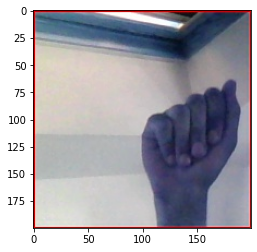

In [5]:
for cat in categories:
    path = os.path.join(path, cat)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img))
        plt.imshow(img_arr)
        plt.show()
        break
    break

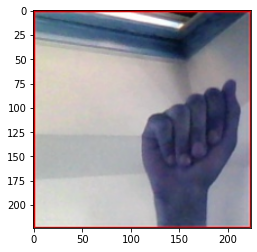

In [6]:
IMG_SIZE = (224, 224)
new_arr = cv2.resize(img_arr, IMG_SIZE)
plt.imshow(new_arr)
plt.show()

In [7]:
path = "/content/asl_alphabet_train/asl_alphabet_train"

datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range=180,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip = True, 
                             validation_split = 0.2)


train_split = datagen.flow_from_directory(path, target_size = IMG_SIZE, class_mode = 'sparse', batch_size = 64,
                                          subset = 'training')
val_split = datagen.flow_from_directory(path, target_size =IMG_SIZE, class_mode = 'sparse', batch_size = 64,
                                        subset = 'validation')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [8]:
from tensorflow.keras import regularizers
IMG_SIZE = (224, 224, 3)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = IMG_SIZE))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(Conv2D(32, kernel_size=3, strides=2, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu' ))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu' ))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(len(categories), activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0

In [10]:
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
history = model.fit(train_split, validation_data = val_split, epochs = 5)

Epoch 1/5
1088/1088 [==============================] - 940s 857ms/step - loss: 2.7443 - accuracy: 0.1826 - val_loss: 2.2833 - val_accuracy: 0.3002
Epoch 2/5
1088/1088 [==============================] - 924s 849ms/step - loss: 1.7840 - accuracy: 0.4205 - val_loss: 1.7454 - val_accuracy: 0.4326
Epoch 3/5
1088/1088 [==============================] - 921s 847ms/step - loss: 1.3020 - accuracy: 0.5641 - val_loss: 1.5907 - val_accuracy: 0.4880
Epoch 4/5
1088/1088 [==============================] - 928s 853ms/step - loss: 1.0513 - accuracy: 0.6432 - val_loss: 1.3305 - val_accuracy: 0.5803
Epoch 5/5
1088/1088 [==============================] - 918s 844ms/step - loss: 0.8921 - accuracy: 0.6946 - val_loss: 1.3373 - val_accuracy: 0.6048


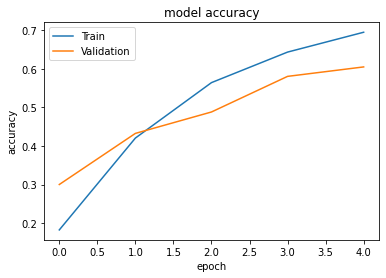

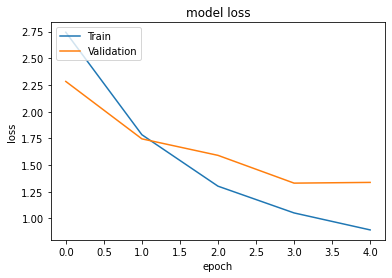

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()